In [1]:
import numpy as np
import torch
from torch import nn
from tropical import Tropical, TropicalMonomial, TropicalPolynomial
from tropical import to_tensor, Tropical, TropicalMonomial, TropicalPolynomial, PolyNet, DiffPolyNet

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import JuPyMake
JuPyMake.InitializePolymake()
JuPyMake.ExecuteCommand("application 'tropical';")

(True, '', '', '')

In [5]:
# = (−1x2)⊕(xy)⊕(−1y2)⊕x⊕y⊕(−1) 

JuPyMake.ExecuteCommand('$a = toTropicalPolynomial("max(x0,x1,-1)");')

(True, '', '', '')

In [6]:
JuPyMake.ExecuteCommand('print $a;')

(True, 'x_0 + x_1 + -1', '', '')

In [7]:
# =-0.5x2⊕(1xy)⊕(−2y2)⊕x⊕y⊕0

JuPyMake.ExecuteCommand('$b = toTropicalPolynomial("max(x0+x1,x1,0)");')

(True, '', '', '')

In [8]:
JuPyMake.ExecuteCommand('print $b;')

(True, 'x_0*x_1 + x_1 + 0', '', '')

In [9]:
JuPyMake.ExecuteCommand('$c = $a * $b;')

(True, '', '', '')

In [10]:
JuPyMake.ExecuteCommand('print $c;')

(True, 'x_0^2*x_1 + x_0*x_1^2 + x_0*x_1 + x_0 + x_1^2 + x_1 + -1', '', '')

# Строим subdivision of polynomial a

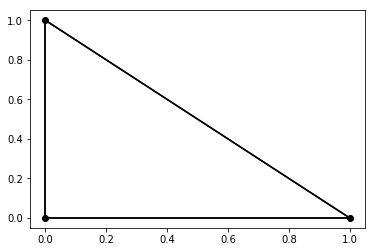

In [11]:
JuPyMake.ExecuteCommand(f'$V = new Hypersurface<Max>(POLYNOMIAL=>$a);')
JuPyMake.ExecuteCommand('$ds = $V->dual_subdivision();')
JuPyMake.ExecuteCommand('$pc = $ds->POLYHEDRAL_COMPLEX;')
pts = JuPyMake.ExecuteCommand('print $pc->VERTICES;')[1]

pts = np.array([[int(j) for j in i.split()[1:]] for i in pts.split('\n')[:-1]])

adj = JuPyMake.ExecuteCommand('print $pc->GRAPH->ADJACENCY;')[1]
adj = np.array([[int(j) for j in i[1:-1].split()] for i in adj.split('\n')[:-1]])

new_simp = []
for i, vv in enumerate(adj):
    for j, v in enumerate(vv):
        new_simp.append([i,v])            

plt.plot(pts[:,0], pts[:,1], 'o', color='black')
for simplex in new_simp:
    plt.plot(pts[simplex, 0], pts[simplex, 1], 'k-') 

In [12]:
JuPyMake.ExecuteCommand('print $V->IS_BALANCED;')

(True,
 'true',
 'polymake: used package atint\n  [[wiki:external_software#a-tint]] is an extension for tropical intersection theory.\n  (C) 2011 - 2015 Simon Hampe, simon.hampe@googlemail.com\n  See also: https://github.com/simonhampe/atint \n\n',
 '')

In [13]:
JuPyMake.ExecuteCommand('print $V->IS_IRREDUCIBLE;')

(True, 'true', '', '')

In [14]:
JuPyMake.ExecuteCommand('print $V->RAYS;')

(True, '1 0 0\n0 0 1\n0 0 -1\n', '', '')

In [15]:
JuPyMake.ExecuteCommand('print $V->WEIGHTS;')

(True, '1', '', '')

In [16]:
JuPyMake.ExecuteCommand('print $V->WEIGHT_CONE->RAYS;')

(True, '1\n', '', '')

# Строим subdivision of polynomial b

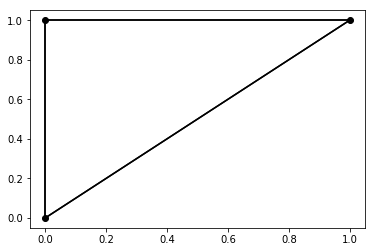

In [17]:
JuPyMake.ExecuteCommand(f'$V = new Hypersurface<Max>(POLYNOMIAL=>$b);')
JuPyMake.ExecuteCommand('$ds = $V->dual_subdivision();')
JuPyMake.ExecuteCommand('$pc = $ds->POLYHEDRAL_COMPLEX;')
pts = JuPyMake.ExecuteCommand('print $pc->VERTICES;')[1]

pts = np.array([[int(j) for j in i.split()[1:]] for i in pts.split('\n')[:-1]])

adj = JuPyMake.ExecuteCommand('print $pc->GRAPH->ADJACENCY;')[1]
adj = np.array([[int(j) for j in i[1:-1].split()] for i in adj.split('\n')[:-1]])

new_simp = []
for i, vv in enumerate(adj):
    for j, v in enumerate(vv):
        new_simp.append([i,v])            

plt.plot(pts[:,0], pts[:,1], 'o', color='black')
for simplex in new_simp:
    plt.plot(pts[simplex, 0], pts[simplex, 1], 'k-') 

In [19]:
JuPyMake.ExecuteCommand('print $V->IS_BALANCED;')

(True, 'true', '', '')

In [20]:
JuPyMake.ExecuteCommand('print $V->IS_IRREDUCIBLE;')

(True, 'true', '', '')

In [21]:
JuPyMake.ExecuteCommand('print $V->RAYS;')

(True, '1 0 0\n0 0 1\n0 0 -1\n', '', '')

In [22]:
JuPyMake.ExecuteCommand('print $V->WEIGHTS;')

(True, '1', '', '')

In [23]:
JuPyMake.ExecuteCommand('print $V->WEIGHT_CONE->RAYS;')

(True, '1\n', '', '')

# Строим subdivision of polynomial c

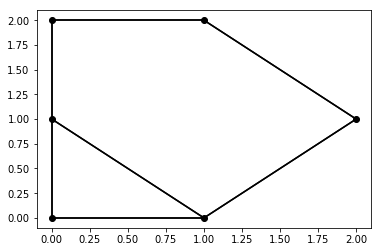

In [26]:
JuPyMake.ExecuteCommand(f'$V = new Hypersurface<Max>(POLYNOMIAL=>$c);')
JuPyMake.ExecuteCommand('$ds = $V->dual_subdivision();')
JuPyMake.ExecuteCommand('$pc = $ds->POLYHEDRAL_COMPLEX;')
pts = JuPyMake.ExecuteCommand('print $pc->VERTICES;')[1]

pts = np.array([[int(j) for j in i.split()[1:]] for i in pts.split('\n')[:-1]])

adj = JuPyMake.ExecuteCommand('print $pc->GRAPH->ADJACENCY;')[1]
adj = np.array([[int(j) for j in i[1:-1].split()] for i in adj.split('\n')[:-1]])

new_simp = []
for i, vv in enumerate(adj):
    for j, v in enumerate(vv):
        new_simp.append([i,v])            

plt.plot(pts[:,0], pts[:,1], 'o', color='black')
for simplex in new_simp:
    plt.plot(pts[simplex, 0], pts[simplex, 1], 'k-') 

In [27]:
JuPyMake.ExecuteCommand('print $V->IS_BALANCED;')

(True, 'true', '', '')

In [28]:
JuPyMake.ExecuteCommand('print $V->IS_IRREDUCIBLE;')

(True, 'true', '', '')

In [29]:
JuPyMake.ExecuteCommand('print $V->RAYS;')

(True, '0 0 -1\n0 0 1\n1 0 0\n', '', '')

In [30]:
JuPyMake.ExecuteCommand('print $V->WEIGHTS;')

(True, '1', '', '')

In [31]:
JuPyMake.ExecuteCommand('print $V->WEIGHT_CONE->RAYS;')

(True, '1\n', '', '')

In [52]:
#max(-1+2*x0,x0+x1,-1+2*x1,x0,x1,-1)
a = TropicalPolynomial([[0,1,0],[0,0,1],[-1,0,0]])

#max(-0.5+2*x0,1+x0+x1,-2+2*x1,x0,x1,0)
b = TropicalPolynomial([[0,1,1],[0,0,1],[0,0,0]])

In [53]:
a

-1 ⨁ a ⨁ b

In [54]:
b

0 ⨁ b ⨁ a⨀b

In [55]:
c = a*b
c

-1 ⨁ b^2 ⨁ a⨀b^2 ⨁ a ⨁ b ⨁ a^2⨀b ⨁ a⨀b

In [56]:
c.minimize()

-1 ⨁ b^2 ⨁ a⨀b^2 ⨁ a ⨁ b ⨁ a^2⨀b

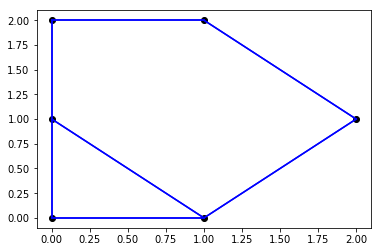

In [57]:
c.minimize().plot_dual_sub(color='blue')